# Patterns in Cell Cycle Gene Expression 

The project is an example of "omics" approaches that measure everything in a population - genomics for genes, transcriptomics for RNA transcripts, proteomics for proteins and so on. Big data like this are becoming more and more popular in biology as they are information-rich and relatively cheap. They require a lot of data exploration and organisation, and are even more useful when many big datasets can be compared at once.

> "The dream of every cell is to become two cells." - Francois Jacob

Cells grow and divide, in the process replicating their DNA, segregating the resulting chromosomes into 2 daughter cells, along with replicating every other part of the cell and checking that all is well at every step. This "cell cycle" involves co-ordinated processes including "gene expression" - transcribing new RNA, translating new proteins to supply the machinery for each stage, and degrading these when they're not needed.

One route to understanding the cell cycle is to measure everything that's going on in cells, and exploring the data to extract patterns. This project uses a dataset of cell-cycle-dependent gene expression in budding yeast *Saccharomyces cerevisiae*, a unicellular eukaryote that is a useful model organism for understanding shared biological processes.

The data are taken from the paper:

> Investigating Conservation of the Cell-Cycle-Regulated Transcriptional Program in the Fungal Pathogen, *Cryptococcus neoformans*.
> Christina M. Kelliher, Adam R. Leman, Crystal S. Sierra, Steven B. Haase. PLoS Genetics, 2016. https://doi.org/10.1371/journal.pgen.1006453

The paper compared datasets from 2 different species of yeast. Here we will focus only on one of them, *Saccharomyces cerevisiae*.


# Yeast gene expression dataset

The *S. cerevisiae*. dataset was generated by first arresting the cell cycle in a culture of yeast cells using a yeast pheromone called alpha factor. Then, the pheromone was washed out, which allows the culture to start the cell cycle synchronously. Samples were taken every 10 minutes and RNA extracted, sequenced, and analysed, giving an RNA-seq or trancriptomic dataset. The dataset gives estimates of the relative amount of mRNA expressed from every yeast gene in the cell across several successive cell cycles.

These data are in the file `GSE80474_Scerevisiae_normalized.txt`, which was part of the supplementary data for the paper.


## Setting up the analysis environment

First we need to load our analysis modules.

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Read in the data

Let's read the data into the python session and look at it.

In [2]:
df = pd.read_table("GSE80474_Scerevisiae_normalized.txt")

In [3]:
df.head()

,time_points,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245
0,15S_rRNA,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,21S_rRNA,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,HRA1,1.853,1.332,1.533,1.381,1.199,1.000,1.000,1.000,1.000,1.159,1.362,1.668,1.171,1.000,1.000,1.000,1.299,1.000,1.801,1.000,1.386,1.466,1.423,1.314,1.657,1.000,1.604,1.479,1.146,1.000,1.000,1.000,1.178,1.340,1.180,1.213,1.000,1.315,1.469,1.333,1.180,1.672,1.346,1.181,1.157,1.337,1.163,1.136,1.466,1.147
3,ICR1,6.440,7.334,4.252,4.448,4.905,6.976,6.323,6.342,5.770,6.511,5.972,5.957,5.206,6.427,8.070,9.647,9.703,8.320,7.939,7.854,7.558,6.326,6.398,7.839,6.609,6.780,7.410,7.764,8.449,5.844,7.151,6.987,6.603,6.632,6.613,5.481,5.234,5.419,5.435,6.134,6.559,6.989,7.156,6.804,7.646,9.093,9.368,8.558,8.830,7.341
4,LSR1,16.821,14.167,8.903,23.702,22.792,29.675,22.024,44.021,8.011,7.492,10.609,9.735,12.841,15.096,21.682,8.668,7.543,8.297,9.124,8.088,10.021,18.033,6.252,9.271,9.041,8.348,9.219,14.157,13.632,14.559,10.245,12.560,8.671,6.865,7.208,12.932,11.221,11.930,7.203,9.030,8.157,10.105,26.766,12.075,11.775,21.421,27.191,16.976,14.725,13.356


In [4]:
df.tail()

,time_points,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245
7121,ARR3,2.747,3.068,3.783,3.309,3.980,3.451,2.948,3.582,3.853,4.118,4.033,3.678,3.737,4.083,3.458,4.044,3.503,2.960,4.045,3.058,3.063,3.823,2.958,2.790,2.950,3.92,4.014,4.586,3.447,2.609,3.089,2.656,3.667,2.938,2.795,2.746,2.269,3.133,2.615,3.017,2.863,4.055,3.715,3.514,2.958,3.699,4.086,3.379,3.105,3.666
7122,YPR202W,1.599,2.630,1.249,2.338,2.817,2.779,1.814,1.937,2.686,1.893,1.763,1.352,1.599,2.321,2.178,2.935,1.944,1.585,1.750,1.624,2.490,2.145,1.593,2.323,1.769,1.16,1.566,1.449,2.026,1.151,1.343,1.967,2.126,1.119,1.253,1.150,1.000,1.442,1.110,1.117,1.380,1.472,1.243,1.254,1.441,1.118,1.344,1.670,1.873,1.206
7123,YPR203W,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7124,YPR204C-A,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7125,YPR204W,1.133,1.206,1.221,1.498,1.471,1.631,1.557,1.380,1.359,1.099,1.158,1.333,1.276,1.328,1.302,1.514,1.484,1.622,1.930,1.802,1.600,1.319,1.579,1.449,1.681,1.51,1.201,1.457,1.436,1.428,1.385,1.386,1.311,1.338,1.179,1.292,1.059,1.235,1.253,1.249,1.337,1.209,1.151,1.045,1.293,1.272,1.183,1.339,1.426,1.310


## What is in the data, really?

This is a real-life dataset taken from a real-life published paper.
We will have to think about what the data mean. 

To get started, it's always a good idea to read the paper that the data came from. The main part of the paper says:

> Total RNA was extracted from yeast cells at each time point (every 5 minutes for S. cerevisiae [...]) and multiplexed for stranded RNA-Sequencing.

The supplementary methods of the paper (Supplementary data S1) give more details on how the data were analysed:

> Transcript quantification of annotated yeast genes was performed using alignment files output from STAR and Cufflinks2 [4]. Time point samples from the respective yeasts were then normalized together using the CuffNorm feature. The normalized FPKM gene expression outputs (“genes.fpkm_table”) were used in the analyses presented. To avoid fractional and zero values, 1 was added to every FPKM value in each dataset using the R statistical programming environment [5]. Fractions and zeros were found to interfere with the periodicity algorithms that involved log-transformation of data points (data not shown). Normalized gene expression data for each yeast are available in S1 and S2 Tables. Raw RNA-Sequencing data from this manuscript have been submitted to the NCBI Gene Expression Omnibus (GEO; http://www.ncbi.nlm.nih.gov/geo/) under accession number GSE80474.

This probably makes little sense if it's your first time seeing RNA-seq.

If you want to know more about the background and how RNA-seq works, the RNAseqlopedia is a great resource: https://rnaseq.uoregon.edu. 


## What you need to know about the data

For this project you need to know:

- Each column is a time point
- Except the first column, that contains gene names or identifiers (more about those below)
- Each row is a gene
- The numbers are estimates of how much of each mRNA is present in each time point
- Precisely, the estimates are in units are Fragments per Kilobase per Million reads (FPKM)
- The authors added 1 every FPKM value to avoid later problems from taking log transformations of zero

Because of this, we will rename the first column of the data frame to `gene`, which is a better description of the contents of the column.

In [5]:
df = df.rename(columns = {'time_points':'gene'})

## Why are they talking about log transformation?

Log transformation is important in many kinds of data analysis and quantitative thinking. Log transformation turns multiplication and division (which are hard) into addition and subtraction (which are easier). Log transformation is also useful for displaying data, where if some of your data values are 100x as large as your other values, log transformations can make them easier to visualise. [This YouTube video by Rafael Irizarry explains log transformation in biology](https://www.youtube.com/watch?v=3huF0DwxCtU).

To see this, let's take a look at the distribution of some of the data.

To get a feel for it, we can focus on a single timepoint at 0 minutes.

In [6]:
estimates_0min = df["0"]
estimates_0min

0        1.000
1        1.000
2        1.853
3        6.440
4       16.821
         ...  
7121     2.747
7122     1.599
7123     1.000
7124     1.000
7125     1.133
Name: 0, Length: 7126, dtype: float64

Plotting a histogram of the distribution in the native scale puts many values close to zero, and doesn't look like anything much:

/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='0', ylabel='Count'>

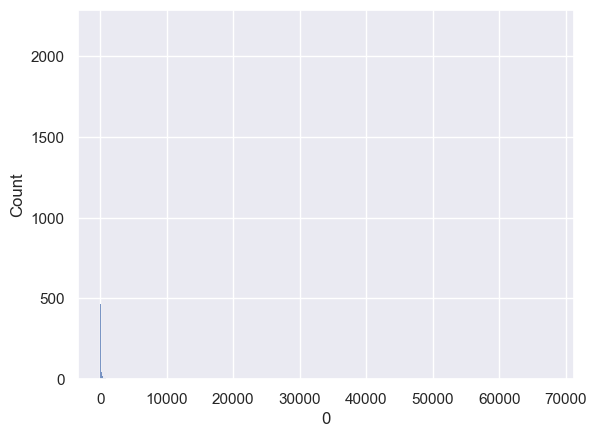

In [7]:
sns.histplot(x = estimates_0min)

Plotting a histogram of the distribution on a log10-scale is more helpful:

/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='0', ylabel='Count'>

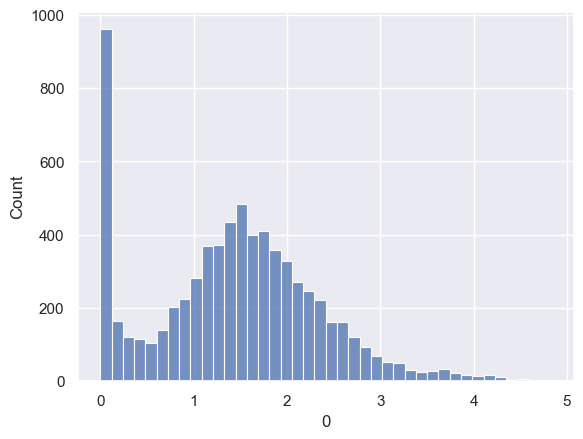

In [8]:
sns.histplot(x = np.log10(estimates_0min))

Here we see that there are many values close to zero, that's the tall bar on the left.
Then there's a broad distribution of expression values over many orders of magnitude.
That means that there are some mRNAs that are 10000 times as abundant as other mRNAs.

You could check if these patterns hold at other timepoints too.

The take-home message: **if your plot doesn't look good or your results don't make sense, try a log-transformation**.

## Tidying the data

These data are not tidy...

> In tidy data: Every column is a variable. Every row is an observation.

Tidying the data will make it easier to plot.

My goal here is that each observation is: one gene, one timepoint, one mRNA abundance. I'm going to call the mRNA abundance estimate FPKM1 to remind me that it is in units of FPKM plus one.

So I'll use `df.melt` to make a data frame with columns `gene`, `time_point`, `FPKM1`.
We also need to make sure that `time_point` is recorded as a number.

In [9]:
df_tidy = df.melt(id_vars = "gene", var_name = "time_point", value_name = "FPKM1")
df_tidy["time_point"] = pd.to_numeric(df_tidy["time_point"], downcast="integer")
df_tidy.head()

,gene,time_point,FPKM1
0,15S_rRNA,0,1.000
1,21S_rRNA,0,1.000
2,HRA1,0,1.853
3,ICR1,0,6.440
4,LSR1,0,16.821


In [10]:
# check the data types
df_tidy.dtypes

gene           object
time_point      int16
FPKM1         float64
dtype: object

## Plot abundance for a gene

Some genes called "cyclins" help to regulate the cell cycle. In yeast these genes are sensibly called CLN1, CLN2, CLN3. There are also B-type cyclins called CLB1 through CLB6.

Let's visualise the mRNA abundance for some of these genes across the cell cycle, starting with cyclin 1.

In [11]:
df_tidy_CLN1 = df_tidy[df_tidy.gene == "CLN1"]
df_tidy_CLN1

,gene,time_point,FPKM1
5417,CLN1,0,2.283
12543,CLN1,5,4.202
19669,CLN1,10,4.560
26795,CLN1,15,40.525
33921,CLN1,20,142.922
41047,CLN1,25,171.222
48173,CLN1,30,149.223
55299,CLN1,35,124.796
62425,CLN1,40,116.432
69551,CLN1,45,96.997


/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='time_point', ylabel='FPKM1'>

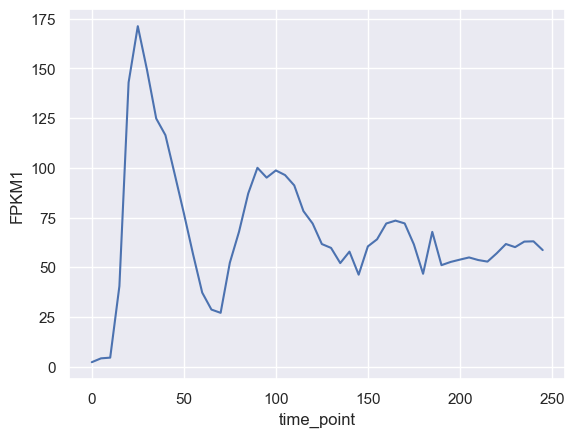

In [12]:
sns.lineplot(data = df_tidy_CLN1, x="time_point", y="FPKM1")

/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='time_point', ylabel='FPKM1'>

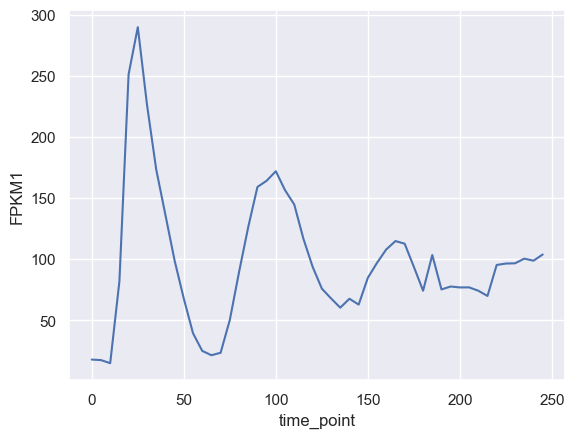

In [13]:
sns.lineplot(data = df_tidy[df_tidy.gene == "CLN2"], x="time_point", y="FPKM1")

Instead of plotting each gene independently, we can plot multiple genes on the same axes in different colours to distinguish them.

/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='time_point', ylabel='FPKM1'>

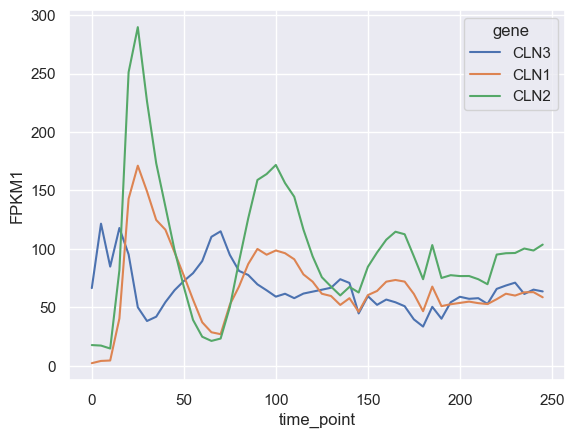

In [14]:
df_tidy_CLN123 = df_tidy[df_tidy.gene.isin(("CLN1", "CLN2", "CLN3"))]

sns.lineplot(data = df_tidy_CLN123, x="time_point", y="FPKM1", hue = "gene")

What if we include both the cyclins and the B-type cyclins?

/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ewallac2/opt/miniconda3/envs/jupyter-2023-06/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='time_point', ylabel='FPKM1'>

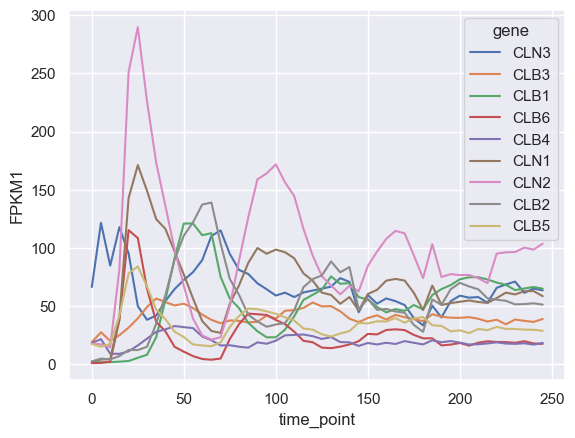

In [15]:
df_tidy_CLNCLB = df_tidy[df_tidy.gene.isin(("CLN1", "CLN2", "CLN3", "CLB1", "CLB2", "CLB3", "CLB4", "CLB5", "CLB6"))]

sns.lineplot(data = df_tidy_CLNCLB, x="time_point", y="FPKM1", hue = "gene")

That lineplot is incomprehensible, there's too many overlapping colours. We'll have to try a different approach. Let's make a heatmap.

<Axes: xlabel='None-time_point', ylabel='gene'>

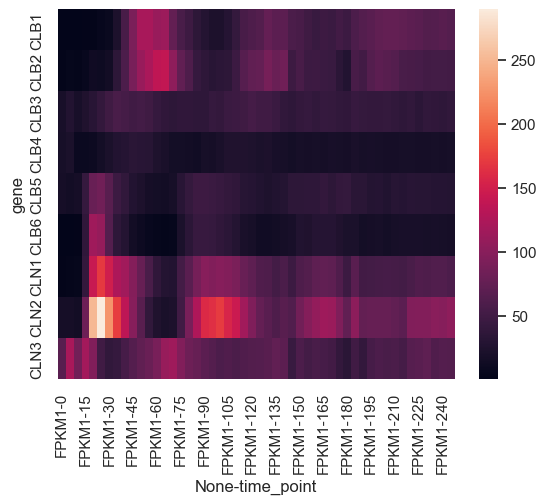

In [16]:
df_tidy_CLNCLB_pivot = df_tidy_CLNCLB.pivot(columns = "time_point", index = "gene")

sns.heatmap(data = df_tidy_CLNCLB_pivot)

In this heatmap it's reasonably clear that CLN3 is expressed first. Then CLN2, CLN1, CLB6 at about the same time. Then CLB1 and CLB2 later. But CLB3 and CLB4 are barely visible because they have lower peak abundance.

So let's try to plot on a log scale.

That doesn't look better. Let's try once more changing the colourmap to a "diverging" colourmap so we can see differences in a different way. 

[Help page on matplotlib colourmaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

<Axes: xlabel='None-time_point', ylabel='gene'>

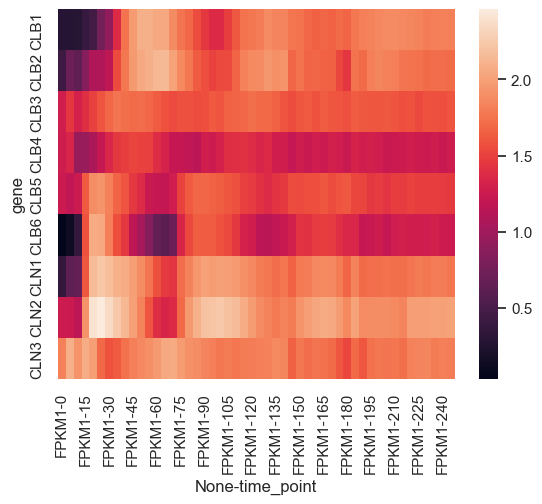

In [17]:
sns.heatmap(data = np.log10(df_tidy_CLNCLB_pivot))

<Axes: xlabel='None-time_point', ylabel='gene'>

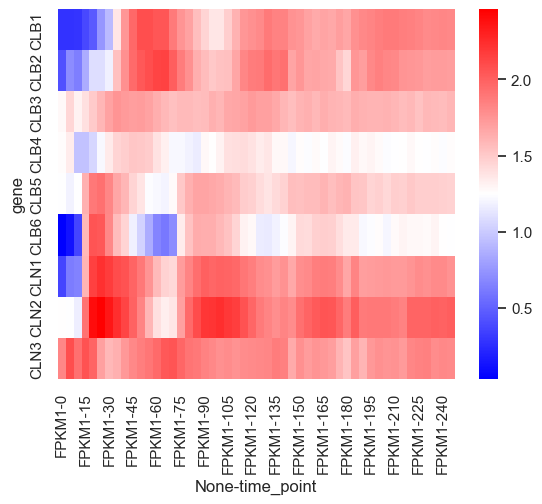

In [18]:
sns.heatmap(data = np.log10(df_tidy_CLNCLB_pivot), cmap="bwr")

This heatmap makes the differences a bit clearer.

What else could you do to make the meaning of the figure more clear? What labels and information are needed to tell a story? For a start, which x-axis and y-axis labels would help?

## Log fold-change

One problem with these plots is that they show abundance of each mRNA relevant to other mRNAs.

What if we need to compare *relative* abundance - i.e. the change in abundance of an mRNA relative to its average? This is an example of scaling and normalisation.

A standard and sensible approach is log fold-change:

- calculate the log of each FPKM1
- calculate the mean log value separately for each gene
- the log fold-change is the log value minus the mean value, separately for each gene.

You should be able to calculate the log fold-change in a new data frame using tools you've learned on the course, including [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). Mostly in genomics people would use a log2 fold-change because it's easy for humans to interpret 2-fold up or 2-fold down. If you need to remind yourself what log2 (logarithm base 2) is, go ahead, it's important.

Then it's helpful to use a heatmap with a diverging colourmap like `bwr`, and with the `center` value set to 0, meaning that when log2 fold change is 0 the gene has its average value. Why not try it?


## What do these gene expression plots over time mean?

These plots show that different cyclins have high expression at different stages of the cell cycle.

Compare that with [Figure 1 of the paper that measures the proportion of cells budded at each timepoint](https://doi.org/10.1371/journal.pgen.1006453.g001).

Can you see how the up-and down correspond to the population of cells starting synchronously, and then becoming less synchronous? So that the time of first budding is about 60 minutes in? Then about 140 minutes cells start to produce second buds, but the peak is broader and wider so the times at which budding happens are spread out over the population?

This also shows in the gene expression. Cell-cycle dependent genes have tight tall peaks in expression during the first cell cycle, then broader and wider peaks at the cell cycle, and at later cycles the cells are no longer synchronised so the peak is barely visible.

When is each cyclin expressed relative to the emergence of buds?

Several research project questions could go along similar lines: which other genes are expressed at which point of the cell cycle? Which functions are needed at different points?

## Suggested hypotheses for a project

This is a big dataset! There are many potential hypotheses that you can explore using this dataset, or even by comparing it with other datasets.

- DNA replication machinery is periodically expressed in the cell cycle.
- Cell wall components are periodically expressed in the cell cycle.
- Functionally related genes are expressed at the same time as DNA replication machinery.
- Distinct cell-cycle promoting cyclins are expressed at different points of the cell cycle.
- Ribosomes are made at a distinct point in the cell cycle.
- Ribosomal biogenesis genes, that make ribosomal RNA, are made before ribosomal proteins are made.
- Gene expression patterns are essentially the same in the first and second cell cycle following arrest.
- Cell cycles proceed essentially the same way however we synchronise the cells, if we compare with datasets using other synchronisation methods.
- Cell cycle dependent gene expression patterns are evolutionarily conserved, if we compare with datasets from other species.

Some of these might use clustering methods such as those we have developed in the course.

A very brief [Overview of the Cell Cycle textbook chapter explains the need for DNA replication](https://www.ncbi.nlm.nih.gov/books/NBK26869/).

# Yeast gene name descriptions

To make more sense of this gene expression data, we need to know more about the genes we are measuring. Which of those are involved in DNA replication, for example? We have matched data containing information on protein-coding genes, including brief descriptions about what's known of gene function. These 2 datasets are linked by gene identifiers.

The file is `yeast_gene_name_descriptions_2023-09-11.tsv`. 
 
It was downloaded from the Saccharomyces Genome Database https://www.yeastgenome.org - this is a huge site that summarises everything known about this yeast. If you want to know more about some yeast genes, you can look up details there and link through to the primary research papers. 

In [19]:
gene_df = pd.read_table("yeast_gene_name_descriptions_2023-09-11.tsv")

In [20]:
gene_df.head()

,Gene.primaryIdentifier,Gene.secondaryIdentifier,Gene.symbol,Gene.name,Gene.description,Gene.qualifier,Gene.chromosome.primaryIdentifier,Gene.chromosomeLocation.start,Gene.chromosomeLocation.end,Gene.chromosomeLocation.strand
0,S000000001,YAL001C,TFC3,Transcription Factor class C,Subunit of RNA polymerase III transcription in...,Verified,chrI,147594.0,151166.0,-1.0
1,S000000002,YAL002W,VPS8,Vacuolar Protein Sorting,Membrane-binding component of the CORVET compl...,Verified,chrI,143707.0,147531.0,1.0
2,S000000003,YAL003W,EFB1,Elongation Factor Beta,Translation elongation factor 1 beta; stimulat...,Verified,chrI,142174.0,143160.0,1.0
3,S000000004,YAL005C,SSA1,Stress-Seventy subfamily A,ATPase involved in protein folding and NLS-dir...,Verified,chrI,139503.0,141431.0,-1.0
4,S000000005,YAL007C,ERP2,Emp24p/Erv25p Related Protein,Member of the p24 family involved in ER to Gol...,Verified,chrI,137698.0,138345.0,-1.0


There is a lot going on here. Each gene has a `primaryIdentifier`, a `secondaryIdentifier`, a `symbol`, and a `name`. Why do they need so many identifiers? One reason is that different databases containing different information need to connect to each other. Another reason is that there are different kinds of biological molecules - for example `YAL001C` is the name of the region of DNA that contains an open reading frame that encodes a protein sequence, and `TFC3`.

Let's look again at the gene names that came in our mRNA abundance data.

In [21]:
df["gene"]

0        15S_rRNA
1        21S_rRNA
2            HRA1
3            ICR1
4            LSR1
          ...    
7121         ARR3
7122      YPR202W
7123      YPR203W
7124    YPR204C-A
7125      YPR204W
Name: gene, Length: 7126, dtype: object

And compare to the gene name data

In [22]:
gene_df["Gene.symbol"]

0       TFC3
1       VPS8
2       EFB1
3       SSA1
4       ERP2
        ... 
6606     NaN
6607     NaN
6608     NaN
6609     NaN
6610     NaN
Name: Gene.symbol, Length: 6611, dtype: object

These look different, and even have different numbers of entries... oh no!?!

Reminder, this is a real-life example with published data derived from public databases and published papers. The problem of making one set of data correspond with another set of data from a different place is an everyday problem in real-life data. The tools we're working with in this course can help.

There are 2 important differences between the genes in these datasets, in fact:
1. The mRNA abundance dataset counts non-coding RNAs like `15S_rRNA` as well as messenger RNAs
2. The mRNA abundance dataset `gene` column is a mixture of protein names (in the `Gene.symbol` column of `gene_df`) and systematic names (in the `Gene.secondaryIdentifier` column).

If you want, you can check this yourself by looking through the lists and searching for some gene names on https://www.yeastgenome.org.

# Making the datasets talk to each other

There are different options as to how to make these agree. Here I will create a new column in `gene_df` called `gene` that contains the `Gene.symbol` if it exists and `Gene.secondaryIdentifier` otherwise.

In [23]:
gene_df["gene"] = gene_df["Gene.symbol"].fillna(gene_df["Gene.secondaryIdentifier"])
gene_df

,Gene.primaryIdentifier,Gene.secondaryIdentifier,Gene.symbol,Gene.name,Gene.description,Gene.qualifier,Gene.chromosome.primaryIdentifier,Gene.chromosomeLocation.start,Gene.chromosomeLocation.end,Gene.chromosomeLocation.strand,gene
0,S000000001,YAL001C,TFC3,Transcription Factor class C,Subunit of RNA polymerase III transcription in...,Verified,chrI,147594.0,151166.0,-1.0,TFC3
1,S000000002,YAL002W,VPS8,Vacuolar Protein Sorting,Membrane-binding component of the CORVET compl...,Verified,chrI,143707.0,147531.0,1.0,VPS8
2,S000000003,YAL003W,EFB1,Elongation Factor Beta,Translation elongation factor 1 beta; stimulat...,Verified,chrI,142174.0,143160.0,1.0,EFB1
3,S000000004,YAL005C,SSA1,Stress-Seventy subfamily A,ATPase involved in protein folding and NLS-dir...,Verified,chrI,139503.0,141431.0,-1.0,SSA1
4,S000000005,YAL007C,ERP2,Emp24p/Erv25p Related Protein,Member of the p24 family involved in ER to Gol...,Verified,chrI,137698.0,138345.0,-1.0,ERP2
...,...,...,...,...,...,...,...,...,...,...,...
6606,S000303808,YHR054C-B,NaN,NaN,Novel ORF identified by enrichment-based prote...,Verified,chrVIII,214517.0,214690.0,-1.0,YHR054C-B
6607,S000303810,YJR107C-A,NaN,NaN,Protein of unknown function; encodes new type ...,Verified,chrX,628457.0,628693.0,-1.0,YJR107C-A
6608,S000303811,YKL104W-A,NaN,NaN,Novel ORF identified by enrichment-based prote...,Verified,chrXI,245032.0,245286.0,1.0,YKL104W-A
6609,S000303812,YLR379W-A,NaN,NaN,Novel ORF identified via pan-genome analysis; ...,Uncharacterized,chrXII,877444.0,877716.0,1.0,YLR379W-A


Check that this new column `gene` has the right contents: it's equal to `Gene.symbol` where that's defined, `Gene.secondaryIdentifier` otherwise.

Now we can merge the data frames.

In [24]:
df_merged_all = gene_df.merge(right = df, on = "gene")

In [25]:
df_merged_all

,Gene.primaryIdentifier,Gene.secondaryIdentifier,Gene.symbol,Gene.name,Gene.description,Gene.qualifier,Gene.chromosome.primaryIdentifier,Gene.chromosomeLocation.start,Gene.chromosomeLocation.end,Gene.chromosomeLocation.strand,gene,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245
0,S000000001,YAL001C,TFC3,Transcription Factor class C,Subunit of RNA polymerase III transcription in...,Verified,chrI,147594.0,151166.0,-1.0,TFC3,9.458,10.677,13.093,11.474,11.371,9.752,11.378,13.470,13.793,16.138,14.634,12.469,12.665,12.657,11.572,11.901,12.645,12.264,10.594,10.716,11.815,12.499,12.516,14.422,14.449,12.208,14.345,12.901,12.899,11.961,13.367,11.215,12.360,14.206,14.069,12.375,12.013,13.152,13.620,12.893,13.719,12.488,12.419,13.465,12.093,12.302,13.695,13.893,13.007,13.205
1,S000000002,YAL002W,VPS8,Vacuolar Protein Sorting,Membrane-binding component of the CORVET compl...,Verified,chrI,143707.0,147531.0,1.0,VPS8,18.610,18.444,18.540,16.915,13.661,11.357,11.998,13.203,14.625,15.959,16.068,16.171,16.200,16.703,15.824,13.311,14.237,14.948,12.398,12.694,14.077,13.500,14.814,14.264,14.050,14.343,15.109,13.844,14.043,13.728,13.593,13.145,13.291,14.498,13.766,13.802,12.579,13.996,14.340,14.652,14.814,14.330,14.925,14.412,14.513,14.132,13.797,15.157,14.998,15.877
2,S000000003,YAL003W,EFB1,Elongation Factor Beta,Translation elongation factor 1 beta; stimulat...,Verified,chrI,142174.0,143160.0,1.0,EFB1,3400.520,2827.290,3071.060,3160.060,3490.650,3655.860,3833.680,4457.640,4465.310,4497.340,4671.430,4843.620,4425.640,4117.500,4099.640,3801.300,4010.910,4049.440,3636.620,4061.890,4249.170,4211.710,4289.020,4363.570,4224.820,4556.720,3785.540,4080.730,3776.740,4413.770,3772.340,3893.190,3722.340,3617.910,3762.200,4032.380,4925.170,4017.600,4082.600,3772.800,3615.190,3810.830,3733.630,3788.270,3721.450,3628.000,3579.060,3448.910,3342.550,3654.200
3,S000000004,YAL005C,SSA1,Stress-Seventy subfamily A,ATPase involved in protein folding and NLS-dir...,Verified,chrI,139503.0,141431.0,-1.0,SSA1,256.883,406.204,599.042,577.717,523.702,392.850,319.944,270.240,259.853,221.147,211.678,204.128,193.668,204.655,202.949,220.169,212.623,250.530,265.126,280.039,310.675,302.936,291.298,292.907,329.694,342.745,334.334,333.909,344.302,367.352,319.172,341.429,321.301,319.279,320.999,363.213,405.613,321.087,352.672,302.716,291.897,296.070,282.968,288.442,288.306,288.273,276.674,280.069,281.205,297.695
4,S000000005,YAL007C,ERP2,Emp24p/Erv25p Related Protein,Member of the p24 family involved in ER to Gol...,Verified,chrI,137698.0,138345.0,-1.0,ERP2,364.339,293.571,278.723,352.132,463.203,619.663,680.766,678.548,603.043,500.710,424.983,370.624,354.960,338.615,326.282,350.640,378.264,423.054,459.588,504.789,496.090,513.640,464.925,446.692,427.546,410.014,378.524,383.997,376.488,457.499,421.359,433.293,461.155,447.145,454.726,520.834,582.474,453.715,482.458,438.420,429.613,412.448,431.269,443.566,401.598,412.639,408.833,419.792,425.238,458.801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,S000113557,YDL007C-A,NaN,NaN,Putative protein of unknown function,Uncharacterized,chrIV,436567.0,436824.0,-1.0,YDL007C-A,1.000,1.000,1.000,1.000,1.000,1.000,1.918,1.000,1.000,1.882,1.000,1.000,1.946,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.885,1.000,1.000,1.000,1.000,2.975,1.000,1.000,1.000,2.318,2.746,1.866,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.861,1.813
6230,S000113566,YLR146W-A,NaN,NaN,Protein of unknown function,Verified,chrXII,433870.0,434058.0,1.0,YLR146W-A,492.480,370.374,310.639,280.087,270.799,274.458,259.071,256.460,300.307,238.848,294.389,294.896,322.638,208.997,390.119,414.732,338.545,3

In [26]:
df_merged_all.shape

(6234, 61)

Notice that this merged dataFrame has fewer rows than either precursor.

I'd guess that this is because some mRNAs weren't detected at all in the expression dataset. Or because the data were generated on a different genome release and the names have changed. It's not always possible to find out without analysing everything again from scratch, and there has to be a really good reason to do that

## Exclude dubious genes

Let's try focusing on genes where there is good evidence that a functional protein is produced. This is because an Open Reading Frame (ORF) is a predicted gene based on the sequence, but predictions are imperfect. As described in [New data and collaborations at the Saccharomyces Genome Database](https://doi.org/10.1093/genetics/iyab224):

> All *S. cerevisiae* ORFs are categorized into one of three groups: “verified” ORFs are those for which there is clear experimental evidence for the presence of expression of a protein-coding gene; “uncharacterized” ORFs are likely, but not yet established, to encode a protein; and “dubious” ORFs are unlikely to encode a protein.

If you look at `gene_df` you'll notice that the `Gene.qualifier` column contains values that correspond to these



In [27]:
gene_df["Gene.qualifier"]

0              Verified
1              Verified
2              Verified
3              Verified
4              Verified
             ...       
6606           Verified
6607           Verified
6608           Verified
6609    Uncharacterized
6610    Uncharacterized
Name: Gene.qualifier, Length: 6611, dtype: object

In [28]:
gene_df["Gene.qualifier"].value_counts()

Gene.qualifier
Verified           5259
Dubious             684
Uncharacterized     668
Name: count, dtype: int64

Let's remove the dubious values and see what we have left

In [29]:
gene_df_nondubious = gene_df[ gene_df["Gene.qualifier"] != "Dubious" ]
gene_df_nondubious["Gene.qualifier"].value_counts()

Gene.qualifier
Verified           5259
Uncharacterized     668
Name: count, dtype: int64

In [30]:
gene_df_nondubious.shape

(5927, 11)

Now let's merge the nondubious values

In [31]:
df_merged = gene_df_nondubious.merge(right = df, on = "gene")

In [32]:
df_merged.shape

(5550, 61)

Still less ... this is probably the best we can do for now.

This merged dataset on non-dubious genes could be a good place to start with connecting functional information in the `gene_df` to the mRNA abundance data. Or, for some analyses it might be easier to first choose a subset of the genes and then analyse the mRNA abundance data accordingly.

# Sanity-saving hint: decide how you want to load and clean up your data

This introduction has spent a lot of time loading, inspecting, tidying, and cleaning data.

You don't want to do that every time.

When you start your project work it's a good idea to:
1. decide what format you want the data in
2. figure out the minimal code that does these essential steps with your data
3. start a new notebook containing the minimal code and test it works

This is a sanity-saving approwch. You don't want to have one explosively messy document where you can't tell what's happening. You also don't want a hundred documents that take different approaches so you can't find anything. Try some things, then clean them up, and make a new and cleaner document when it's helpful.

## Picking cyclin-related genes out

As one example of how we could proceed to plot a subset of genes, let's find all the genes whose description involves "cyclin", then plot those.


In [33]:
gene_df_cyclinrelated = gene_df[gene_df["Gene.description"].str.contains("cyclin")]
gene_df_cyclinrelated

,Gene.primaryIdentifier,Gene.secondaryIdentifier,Gene.symbol,Gene.name,Gene.description,Gene.qualifier,Gene.chromosome.primaryIdentifier,Gene.chromosomeLocation.start,Gene.chromosomeLocation.end,Gene.chromosomeLocation.strand,gene
37,S000000038,YAL040C,CLN3,CycLiN,G1 cyclin involved in cell cycle progression; ...,Verified,chrI,65778.0,67520.0,-1.0,CLN3
171,S000000180,YBL084C,CDC27,Cell Division Cycle,Subunit of the Anaphase-Promoting Complex/Cycl...,Verified,chrII,67169.0,69445.0,-1.0,CDC27
353,S000000364,YBR160W,CDC28,Cell Division Cycle,Cyclin-dependent kinase (CDK) catalytic subuni...,Verified,chrII,560078.0,560974.0,1.0,CDC28
439,S000000450,YBR246W,RRT2,Regulator of rDNA Transcription,Methylesterase performing penultimate step of ...,Verified,chrII,711591.0,712754.0,1.0,RRT2
447,S000000458,YBR254C,TRS20,TRapp Subunit,Core component of transport protein particle (...,Verified,chrII,723736.0,724263.0,-1.0,TRS20
460,S000000471,YBR267W,REI1,REquired for Isotropic bud growth,Cytoplasmic pre-60S factor; required for the c...,Verified,chrII,739841.0,741022.0,1.0,REI1
592,S000000632,YCR036W,RBK1,RiBoKinase,"Ribokinase, phosphorylates ribose to ribose-5-...",Verified,chrIII,193297.0,194298.0,1.0,RBK1
709,S000000781,YEL055C,POL5,POLymerase,Protein involved in 60S assembly and pre-40S A...,Verified,chrV,48471.0,51539.0,-1.0,POL5
789,S000000861,YER059W,PCL6,Pho85 CycLin,Pho85p cyclin of the Pho80p subfamily; forms t...,Verified,chrV,272624.0,273886.0,1.0,PCL6
839,S000000913,YER111C,SWI4,SWItching deficient,DNA binding component of the SBF complex (Swi4...,Verified,chrV,382595.0,385876.0,-1.0,SWI4


Wait, that's missing CLN3. Let's search for `cyclin` and `Cyclin` etc, by ignoring the case of the search term.

Here I will use a regular expression (`re`) because that's the way I know how to search case-insensitively. I looked up help for [`pandas.Series.str.contains`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).

In [34]:
#importing regular expression module
import re

gene_df_cyclinrelated = gene_df[gene_df["Gene.description"].str.contains("cyclin", flags=re.IGNORECASE)]
gene_df_cyclinrelated

,Gene.primaryIdentifier,Gene.secondaryIdentifier,Gene.symbol,Gene.name,Gene.description,Gene.qualifier,Gene.chromosome.primaryIdentifier,Gene.chromosomeLocation.start,Gene.chromosomeLocation.end,Gene.chromosomeLocation.strand,gene
37,S000000038,YAL040C,CLN3,CycLiN,G1 cyclin involved in cell cycle progression; ...,Verified,chrI,65778.0,67520.0,-1.0,CLN3
171,S000000180,YBL084C,CDC27,Cell Division Cycle,Subunit of the Anaphase-Promoting Complex/Cycl...,Verified,chrII,67169.0,69445.0,-1.0,CDC27
328,S000000339,YBR135W,CKS1,Cdc28 Kinase Subunit,Cyclin-dependent protein kinase regulatory sub...,Verified,chrII,504854.0,505306.0,1.0,CKS1
353,S000000364,YBR160W,CDC28,Cell Division Cycle,Cyclin-dependent kinase (CDK) catalytic subuni...,Verified,chrII,560078.0,560974.0,1.0,CDC28
439,S000000450,YBR246W,RRT2,Regulator of rDNA Transcription,Methylesterase performing penultimate step of ...,Verified,chrII,711591.0,712754.0,1.0,RRT2
447,S000000458,YBR254C,TRS20,TRapp Subunit,Core component of transport protein particle (...,Verified,chrII,723736.0,724263.0,-1.0,TRS20
460,S000000471,YBR267W,REI1,REquired for Isotropic bud growth,Cytoplasmic pre-60S factor; required for the c...,Verified,chrII,739841.0,741022.0,1.0,REI1
592,S000000632,YCR036W,RBK1,RiBoKinase,"Ribokinase, phosphorylates ribose to ribose-5-...",Verified,chrIII,193297.0,194298.0,1.0,RBK1
709,S000000781,YEL055C,POL5,POLymerase,Protein involved in 60S assembly and pre-40S A...,Verified,chrV,48471.0,51539.0,-1.0,POL5
789,S000000861,YER059W,PCL6,Pho85 CycLin,Pho85p cyclin of the Pho80p subfamily; forms t...,Verified,chrV,272624.0,273886.0,1.0,PCL6


We'll use the same idea we used earlier for the CLN and CLB genes, search for  `df_tidy_CLNCLB_pivot` above

<Axes: xlabel='None-time_point', ylabel='gene'>

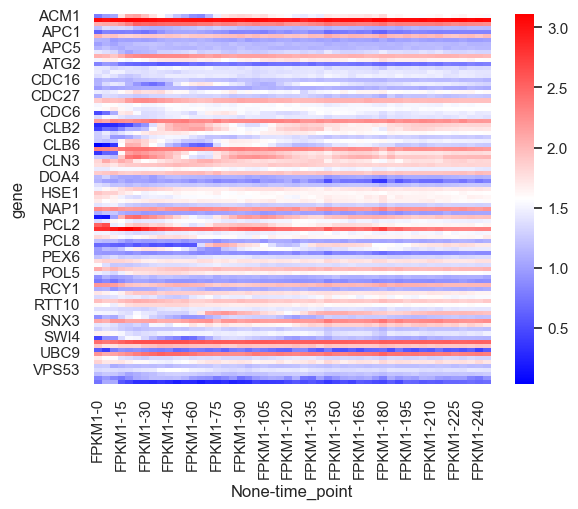

In [35]:
df_tidy_cyclinrelated = df_tidy[ df_tidy.gene.isin( gene_df_cyclinrelated.gene )]
df_tidy_cyclinrelated_pivot = df_tidy_cyclinrelated.pivot(columns = "time_point", index = "gene")

sns.heatmap(data = np.log10(df_tidy_cyclinrelated_pivot), cmap = "bwr")

There's more work to do here to make an interpretable plot. You could try: 
- plotting log2 fold-change instead of log10(FPKM1).
- giving the axes helpful names and labels.
- adjusting plot size so every gene name appears.
- plotting fewer genes, after reading the descriptions to make sense of which to choose.
- clustering the plot so genes with similar abundance are plotted together.

Still, this is an example of how to explore the data.

# Conclusion

Here we presented
- a dataset of yeast mRNA abundance during the cell cycle
- a dataset of yeast gene names and descriptions
- a few ideas about how to approach the data
- some potential hypotheses to address using the data

Your mission is to think through a hypothesis that you would like to address, then use the data provided and the tools taught in the course to address that hypothesis, and then to explain what you learned.